<a href="https://colab.research.google.com/github/Manya123-max/Machine-Learning-Algorithms/blob/main/HierarchicalClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

In [ ]:
# Load the dataset
data = pd.read_csv('/content/MOBILE PRICE PREDICTION.csv')
print(data)

       Brand              Model Storage    RAM  Screen Size (inches)  \
0      Apple      iPhone 13 Pro   128 GB   6 GB                  6.1   
1    Samsung   Galaxy S21 Ultra   256 GB  12 GB                  6.8   
2    OnePlus              9 Pro   128 GB   8 GB                  6.7   
3     Xiaomi  Redmi Note 10 Pro   128 GB   6 GB                 6.67   
4     Google            Pixel 6   128 GB   8 GB                  6.4   
..       ...                ...      ...    ...                  ...   
402  Samsung   Galaxy Note20 5G      128      8                  6.7   
403   Xiaomi      Mi 10 Lite 5G      128      6                 6.57   
404    Apple  iPhone 12 Pro Max      128      6                  6.7   
405     Oppo              Reno3      128      8                  6.4   
406  Samsung    Galaxy S10 Lite      128      6                  6.7   

            Camera (MP)  Battery Capacity (mAh) Price ($)  
0          12 + 12 + 12                    3095       999  
1    108 + 10 +

In [ ]:
# Data shape and basic info
print(data.shape)
print(data.head(10))
print(data.info())

(407, 8)
     Brand              Model Storage    RAM  Screen Size (inches)  \
0    Apple      iPhone 13 Pro   128 GB   6 GB                  6.1   
1  Samsung   Galaxy S21 Ultra   256 GB  12 GB                  6.8   
2  OnePlus              9 Pro   128 GB   8 GB                  6.7   
3   Xiaomi  Redmi Note 10 Pro   128 GB   6 GB                 6.67   
4   Google            Pixel 6   128 GB   8 GB                  6.4   
5    Apple          iPhone 13   128 GB   4 GB                  6.1   
6  Samsung     Galaxy Z Flip3   256 GB   8 GB                  6.7   
7   Xiaomi        Poco X3 Pro   128 GB   6 GB                 6.67   
8     Oppo      Reno6 Pro+ 5G   128 GB   8 GB                 6.55   
9     Vivo           X70 Pro+   256 GB  12 GB                 6.78   

          Camera (MP)  Battery Capacity (mAh) Price ($)  
0        12 + 12 + 12                    3095       999  
1  108 + 10 + 10 + 12                    5000      1199  
2     48 + 50 + 8 + 2                    4500 

In [ ]:
# Check for missing values and duplicates
print(data.isnull().sum())
print(data.duplicated().sum())

Brand                     0
Model                     0
Storage                   0
RAM                       0
Screen Size (inches)      0
Camera (MP)               0
Battery Capacity (mAh)    0
Price ($)                 0
dtype: int64
26


In [ ]:
data1=data.drop_duplicates()
print(data1)

       Brand              Model Storage    RAM  Screen Size (inches)  \
0      Apple      iPhone 13 Pro   128 GB   6 GB                  6.1   
1    Samsung   Galaxy S21 Ultra   256 GB  12 GB                  6.8   
2    OnePlus              9 Pro   128 GB   8 GB                  6.7   
3     Xiaomi  Redmi Note 10 Pro   128 GB   6 GB                 6.67   
4     Google            Pixel 6   128 GB   8 GB                  6.4   
..       ...                ...      ...    ...                  ...   
401   Huawei           P30 Lite      128      4                 6.15   
402  Samsung   Galaxy Note20 5G      128      8                  6.7   
403   Xiaomi      Mi 10 Lite 5G      128      6                 6.57   
404    Apple  iPhone 12 Pro Max      128      6                  6.7   
405     Oppo              Reno3      128      8                  6.4   

            Camera (MP)  Battery Capacity (mAh) Price ($)  
0          12 + 12 + 12                    3095       999  
1    108 + 10 +

In [ ]:
# Assuming df is your DataFrame
# First, identify columns with categorical data
categorical_cols = data1.select_dtypes(include=['object']).columns.tolist()

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Iterate through each categorical column and encode the values
for col in categorical_cols:
    data1[col] = label_encoder.fit_transform(data1[col])

# Now, data contains the encoded values for categorical columns
print(data1)

     Brand  Model  Storage   RAM   Screen Size (inches)  Camera (MP)  \
0        0    232         1    15                     8           15   
1       12    100         4     1                    35            0   
2        9     19         1    18                    31           53   
3       15    178         1    15                    30          119   
4        4    162         1    18                    15           87   
..     ...    ...       ...   ...                   ...          ...   
401      5    155         0    10                     9           69   
402     12     95         0    17                    31           19   
403     15    111         0    14                    26           70   
404      0    229         0    14                    31           17   
405     10    188         0    17                    15           59   

     Battery Capacity (mAh)  Price ($)  
0                      3095         88  
1                      5000         45  
2           

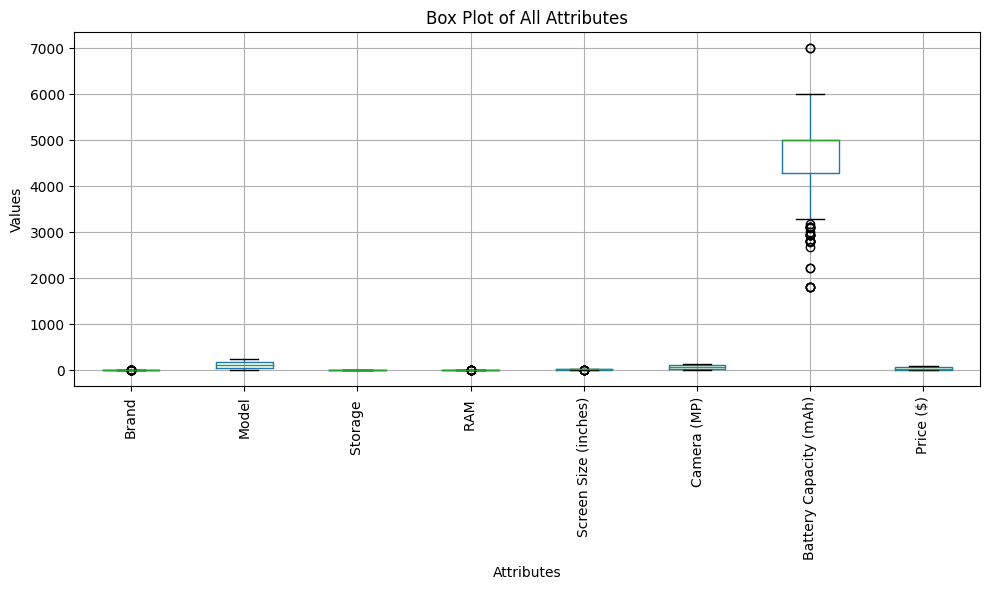

In [ ]:
# Create box plots for all attributes
plt.figure(figsize=(10, 6))  # Set the figure size
data1.boxplot()  # Create box plots for all attributes
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Box Plot of All Attributes')
plt.ylabel('Values')
plt.xlabel('Attributes')
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

In [ ]:
# Handling outliers
def handle_outliers(data1, threshold=3):
    numerical_columns = data1.select_dtypes(include=np.number).columns
    for column in numerical_columns:
        z_scores = np.abs((data1[column] - data1[column].mean()) / data1[column].std())
        data1 = data1[z_scores < threshold]
    return data1

# Call the function to handle outliers
cleaned_data = handle_outliers(data1=data1)
print(cleaned_data)

     Brand  Model  Storage   RAM   Screen Size (inches)  Camera (MP)  \
0        0    232         1    15                     8           15   
1       12    100         4     1                    35            0   
2        9     19         1    18                    31           53   
3       15    178         1    15                    30          119   
4        4    162         1    18                    15           87   
..     ...    ...       ...   ...                   ...          ...   
401      5    155         0    10                     9           69   
402     12     95         0    17                    31           19   
403     15    111         0    14                    26           70   
404      0    229         0    14                    31           17   
405     10    188         0    17                    15           59   

     Battery Capacity (mAh)  Price ($)  
0                      3095         88  
1                      5000         45  
2           

In [ ]:
X=cleaned_data.copy()

In [ ]:
# Normalize the data
scaler = StandardScaler()
X_normalized = scaler.fit_transform(cleaned_data)

# Create a DataFrame from the normalized data
normalized_data = pd.DataFrame(X_normalized, columns=cleaned_data.columns)
print(normalized_data)

        Brand     Model  Storage       RAM   Screen Size (inches)  \
0   -2.580906  1.667755 -0.729418  0.440610             -1.855439   
1    0.422476 -0.231869 -0.012741 -2.509902              1.770564   
2   -0.328370 -1.397548 -0.729418  1.072862              1.233378   
3    1.173321  0.890636 -0.729418  0.440610              1.099082   
4   -1.579779  0.660379 -0.729418  1.072862             -0.915364   
..        ...       ...       ...       ...                   ...   
370 -1.329497  0.559641 -0.968310 -0.613145             -1.721142   
371  0.422476 -0.303825 -0.968310  0.862112              1.233378   
372  1.173321 -0.073567 -0.968310  0.229859              0.561896   
373 -2.580906  1.624582 -0.968310  0.229859              1.233378   
374 -0.078088  1.034547 -0.968310  0.862112             -0.915364   

     Camera (MP)  Battery Capacity (mAh)  Price ($)  
0      -1.398944               -2.273675   1.792778  
1      -1.760789                0.379364   0.170161  
2      -0

"# Finding best “K” using Scatter plot with various clusters head\nac2 = AgglomerativeClustering(n_clusters = 2)\n# Visualizing the clustering\nplt.figure(figsize =(8, 8))\nplt.scatter(X_principal['P1'], X_principal['P2'], c = ac2.fit_predict(X_principal), cmap ='rainbow')\nplt.show()"

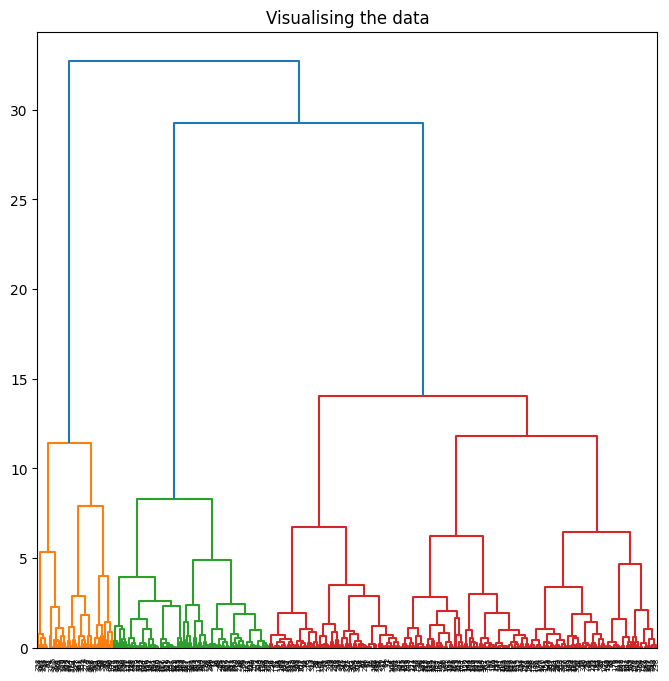

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc
# PCA – Preprocesing
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(normalized_data)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']
# Modeling and display
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward')))
'''# Finding best “K” using Scatter plot with various clusters head
ac2 = AgglomerativeClustering(n_clusters = 2)
# Visualizing the clustering
plt.figure(figsize =(8, 8))
plt.scatter(X_principal['P1'], X_principal['P2'], c = ac2.fit_predict(X_principal), cmap ='rainbow')
plt.show()'''


Number of clusters: 2
Silhouette Score: 0.495


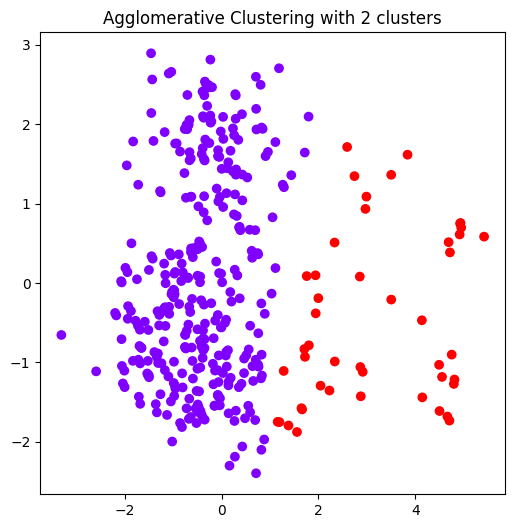


Number of clusters: 4
Silhouette Score: 0.342


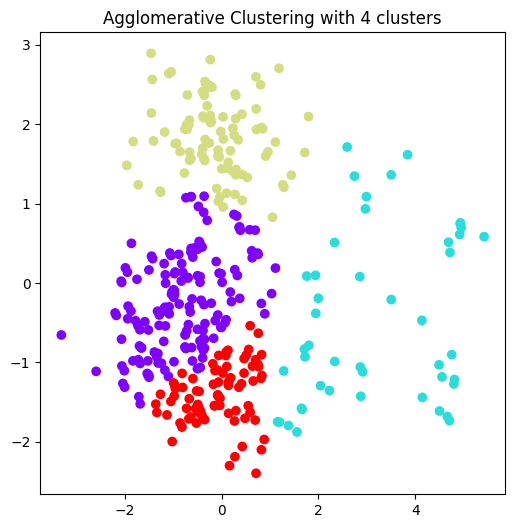


Number of clusters: 6
Silhouette Score: 0.350


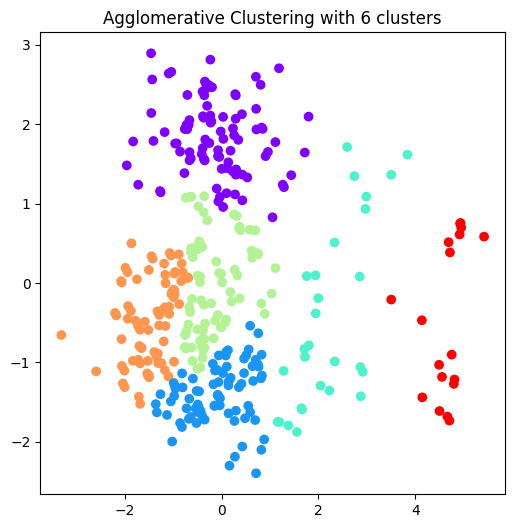

In [ ]:
# Agglomerative Clustering with different cluster counts
clusters = [2, 4, 6]
silhouette_scores = []

for n_clusters in clusters:
    ac = AgglomerativeClustering(n_clusters=n_clusters)
    labels = ac.fit_predict(X_principal)

    # Print cluster information and silhouette score
    silhouette_avg = silhouette_score(X_principal, labels)
    silhouette_scores.append(silhouette_avg)

    print(f"\nNumber of clusters: {n_clusters}")
    print(f"Silhouette Score: {silhouette_avg:.3f}")

    # Plot clustering results
    plt.figure(figsize=(6, 6))
    plt.scatter(X_principal['P1'], X_principal['P2'], c=labels, cmap='rainbow')
    plt.title(f'Agglomerative Clustering with {n_clusters} clusters')
    plt.show()

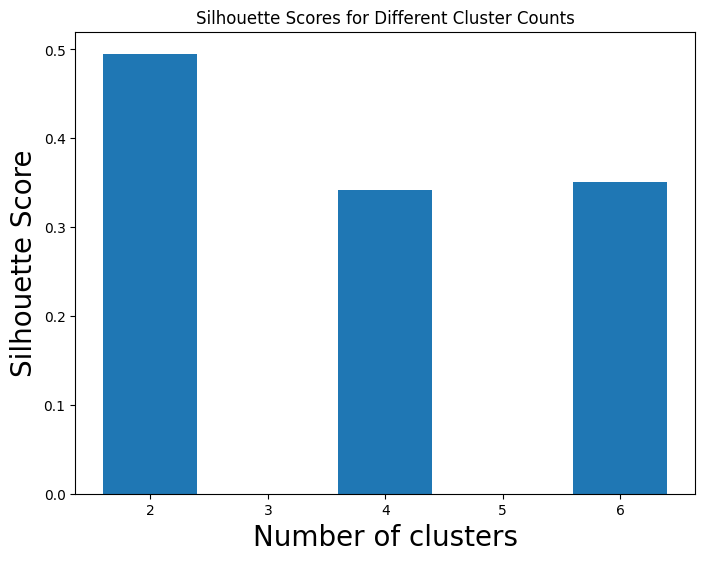

In [ ]:
# Plotting a bar graph to compare the silhouette scores
plt.figure(figsize=(8, 6))
plt.bar(clusters, silhouette_scores)
plt.xlabel('Number of clusters', fontsize=20)
plt.ylabel('Silhouette Score', fontsize=20)
plt.title('Silhouette Scores for Different Cluster Counts')
plt.show()